# NFW_Plot

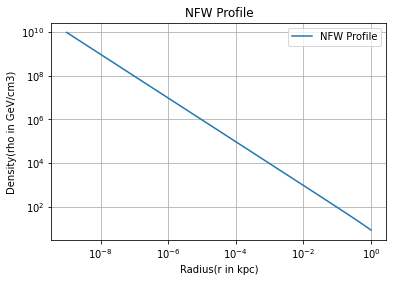

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def nfw_profile(r, rs, rhos):
    """
    NFW density profile function.

    Parameters:
        r (float or numpy array): Radius.
        rs (float): Scale radius.
        rho0 (float): Characteristic density.

    Returns:
        float or numpy array: NFW density profile at the given radius.
    """
    x = r / rs
    return rhos / (x * (1 + x)**2)

# Set the parameters for the NFW profile
r0 = 8.2
rs = 18.6 # Scale radius
rho0 =  0.383
rhos =  rho0*(r0/rs)*((1+(r0/rs))**2) # Characteristic density


r = np.linspace(10**(-9), 1, 100)

# Calculate the NFW density profile at each radius
density_NFW = nfw_profile(r, rs, rhos)

# Plot the NFW profile
plt.plot(r, density_NFW, label='NFW Profile')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Radius(r in kpc)')
plt.ylabel('Density(rho in GeV/cm3)')
plt.title('NFW Profile')
plt.grid(True)
plt.legend()
plt.show()


# NFW+Spike GS benchmarks

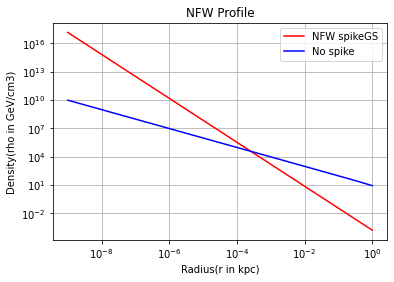

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def nfw_spikeGS(r,Rsp,gamma_sp):
    x = r / Rsp
    return  nfw_profile(Rsp, rs, rhos)*x**(-gamma_sp)

# Set the parameters for the NFW profile
r0 = 8.2
rs = 18.6 # Scale radius
rho0 =  0.383
Rsp = 0.34*10**(-3)
gamma_sp = 2.325
rhos =  rho0*(r0/rs)*((1+(r0/rs))**2) # Characteristic density


r = np.linspace(10**(-9), 1, 100)

# Calculate the NFW density profile at each radius
density_spikeGS = nfw_spikeGS(r,Rsp,gamma_sp)

# Plot the NFW profile
plt.plot(r, density_spikeGS, label='NFW spikeGS',color='r')
plt.plot(r, density_NFW, label='No spike',color='b')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Radius(r in kpc)')
plt.ylabel('Density(rho in GeV/cm3)')
plt.title('NFW Profile')
plt.grid(True)
plt.legend()
plt.show()


# NFW+Spike at Stellar heating benchmark

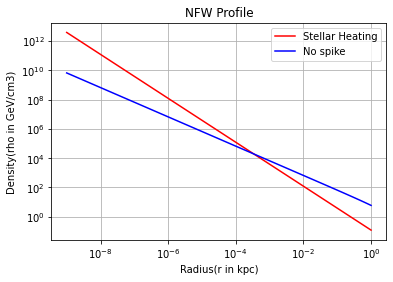

In [61]:
import numpy as np
import matplotlib.pyplot as plt

def nfw_Stellar(r, Rsp,gamma_sp):
    x = r / Rsp
    return  nfw_profile(Rsp, rs, rhos)*x**(-gamma_sp)

# Set the parameters for the NFW profile
r0 = 8.2
rs = 18.6 # Scale radius
rho0 =  0.383
Rsp = 0.34*10**(-3)
gamma_sp = 1.5
rhos =  rho0*(r0/rs)*((1+(r0/rs))**2) # Characteristic density


r = np.linspace(10**(-9), 1, 100)

# Calculate the NFW density profile at each radius
density_stellar = nfw_Stellar(r, Rsp,gamma_sp)

# Plot the NFW profile
plt.plot(r, density_stellar, label='Stellar Heating',color='r')
plt.plot(r, density_NFW, label='No spike',color='b')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Radius(r in kpc)')
plt.ylabel('Density(rho in GeV/cm3)')
plt.title('NFW Profile')
plt.grid(True)
plt.legend()
plt.show()


# NFW+Spike at BM benchmark

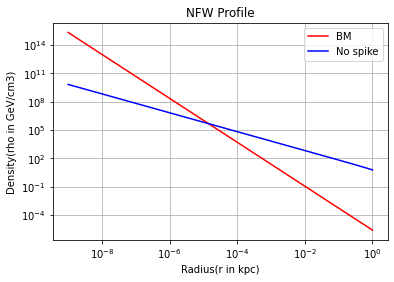

In [62]:
import numpy as np
import matplotlib.pyplot as plt

def nfw_BM(r, Rsp,gamma_sp):
    x = r / Rsp
    return  nfw_profile(Rsp, rs, rhos)*x**(-gamma_sp)

# Set the parameters for the NFW profile
r0 = 8.2
rs = 18.6 # Scale radius
rho0 =  0.383
gamma = 0.75
gamma_sp = 2.325
tau = 10
Rsp = (0.34*10**(-3))*(np.exp((-tau)/(2*(gamma_sp-gamma))))
rhos =  rho0*(r0/rs)*((1+(r0/rs))**2) # Characteristic density


r = np.linspace(10**(-9), 1, 100)

# Calculate the NFW density profile at each radius
density_BM = nfw_BM(r, Rsp,gamma_sp)

# Plot the NFW profile
plt.plot(r, density_BM, label='BM',color='r')
plt.plot(r, density_NFW, label='No spike',color='b')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Radius(r in kpc)')
plt.ylabel('Density(rho in GeV/cm3)')
plt.title('NFW Profile')
plt.grid(True)
plt.legend()
plt.show()


# NFW+Spike at less stellar heating benchmark

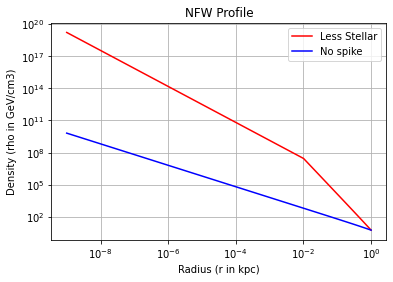

In [63]:
import numpy as np
import matplotlib.pyplot as plt

def nfw_lessstellar(r, Rsp, gamma_sp):
    x = np.where(r > 10**(-5), r, r / Rsp)
    return nfw_profile(x, rs, rhos) * x**(-gamma_sp)

# Set the parameters for the NFW profile
r0 = 8.2
rs = 18.6  # Scale radius
rho0 = 0.383
Rsp = 0.34 * 10**(-3)
gamma_sp = 2.325
rhos = rho0 * (r0 / rs) * ((1 + (r0 / rs))**2)


r = np.linspace(10**(-9), 1, 100)

# Calculate the NFW density profile at each radius
density_lesserheating = nfw_lessstellar(r, Rsp, gamma_sp)

# Plot the NFW profile
plt.plot(r, density_lesserheating, label='Less Stellar', color='r')
plt.plot(r, density_NFW, label='No spike',color='b')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Radius (r in kpc)')
plt.ylabel('Density (rho in GeV/cm3)')
plt.title('NFW Profile')
plt.grid(True)
plt.legend()
plt.show()


# Combined plot

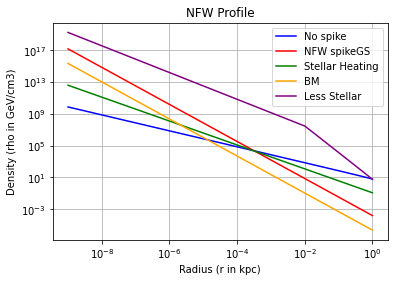

In [72]:
plt.plot(r, density_NFW, label='No spike',color='blue')
plt.plot(r, density_spikeGS, label='NFW spikeGS',color='red')
plt.plot(r, density_stellar, label='Stellar Heating',color='green')
plt.plot(r, density_BM, label='BM',color='orange')
plt.plot(r, density_lesserheating, label='Less Stellar', color='purple')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Radius (r in kpc)')
plt.ylabel('Density (rho in GeV/cm3)')
plt.title('NFW Profile')
plt.grid(True)
plt.legend()
plt.show()